# Compression Results

## Dictonary Encoding

In [1]:
# imports
%matplotlib inline
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import os

def asByte(bytes):
    return bytes, 'Size in Bytes'

def toKB(bytes):
    return (bytes / 1024), 'Size in KB'

def toMB(bytes):
    return (toKB(bytes)[0] / 1024), 'Size in MB'

def toGB(bytes):
    return (toMB(bytes)[0] / 1024), 'Size in GB'

def asNanoseconds(nano):
    return nano, 'Time in ns'

def toMicroseconds(nano):
    return (nano / 1000), 'Time in µs'

def toMilliseconds(nano):
    return (toMicroseconds(nano)[0] / 1000), 'Time in ms'

def toSeconds(nano):
    return (toMilliseconds(nano)[0] / 1000), 'Time in s'

def pathToTitle(path, with_parent_dir=True):
    title = os.path.splitext(os.path.basename(path))[0].replace('_', ' ')
    if with_parent_dir:
        encoding = os.path.split(os.path.dirname(path))[-1]
        return "{encoding} {title}".format(encoding=encoding, title=title).title()
    else:
        return "{title}".format(title=title).title()


ORDERKEY          34.332275
CUSTKEY           34.332275
ORDERSTATUS      283.241272
TOTALPRICE        34.332275
ORDERDATE         68.664551
ORDERPRIORITY    346.766669
CLERK            403.404236
SHIPPRIORITY      34.332275
COMMENT          690.933191
Name: 0, dtype: float64

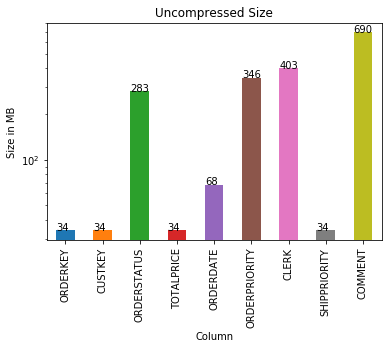

In [2]:
path = '../data/dictionary/uncompressed_size.csv'
data = pd.read_csv(path, sep=',')
data, label = toMB(data)

ax = data.iloc[0].plot(kind='bar', logy=True, title=pathToTitle(path, False))
ax.set(xlabel="Column", ylabel=label)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

data.iloc[0]

ORDERKEY          68.664551
CUSTKEY           36.621094
ORDERSTATUS        8.583163
TOTALPRICE        17.212940
ORDERDATE         17.175102
ORDERPRIORITY      8.583261
CLERK             17.228889
SHIPPRIORITY       8.583073
COMMENT          725.265467
Name: 0, dtype: float64

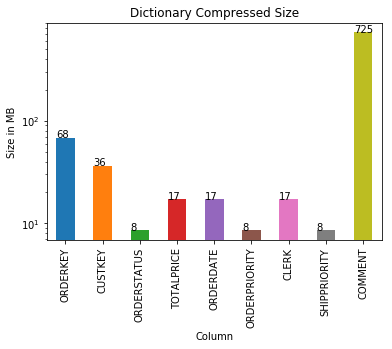

In [3]:
path = '../data/dictionary/compressed_size.csv'
data = pd.read_csv(path, sep=',')
data, label = toMB(data)

ax = data.iloc[0].plot(kind='bar', logy=True, title=pathToTitle(path))
ax.set(xlabel="Column", ylabel=label)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

data.iloc[0]

ORDERKEY          0.500000
CUSTKEY           0.937500
ORDERSTATUS      32.999600
TOTALPRICE        1.994560
ORDERDATE         3.997910
ORDERPRIORITY    40.400300
CLERK            23.414400
SHIPPRIORITY      4.000000
COMMENT           0.952662
Name: 0, dtype: float64

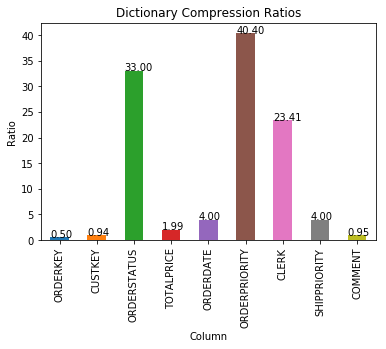

In [4]:
path = '../data/dictionary/compression_ratios.csv'
data = pd.read_csv(path, sep=',')

ax = data.iloc[0].plot(kind='bar', logy=False, title=pathToTitle(path))
ax.set(xlabel="Column", ylabel="Ratio")
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()), (p.get_x(), p.get_height()))

data.iloc[0]

ORDERKEY           752.645456
CUSTKEY            922.065194
ORDERSTATUS       1080.734703
TOTALPRICE         579.574786
ORDERDATE          223.562979
ORDERPRIORITY     1566.510782
CLERK             1345.666358
SHIPPRIORITY       190.608027
COMMENT          19845.706831
Name: 0, dtype: float64

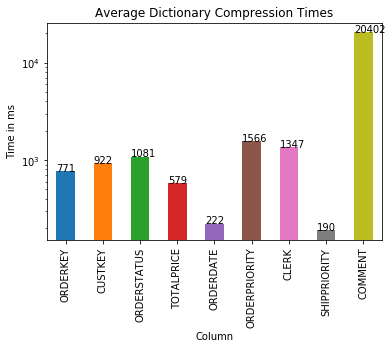

In [5]:
path = '../data/dictionary/compression_times.csv'
data = pd.read_csv(path, sep=',')
data, label = toMilliseconds(data)

ax = data.apply(pd.Series.mean).plot(kind='bar', logy=True, title='Average ' + pathToTitle(path))
ax.set(xlabel="Column", ylabel=label)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

data.iloc[0]

[Text(0,0.5,'Time in ms'), Text(0.5,0,'Column')]

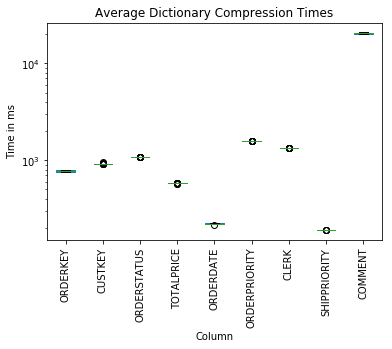

In [6]:
path = '../data/dictionary/compression_times.csv'
data = pd.read_csv(path, sep=',')
data, label = toMilliseconds(data)

ax = data.plot(kind='box', logy=True, title='Average ' + pathToTitle(path))
plt.xticks(rotation=90)
ax.set(xlabel="Column", ylabel=label)

ORDERKEY           23.395158
CUSTKEY            31.113023
ORDERSTATUS        43.957416
TOTALPRICE         15.018135
ORDERDATE          15.586558
ORDERPRIORITY      82.744730
CLERK              50.751406
SHIPPRIORITY       14.933064
COMMENT          1226.420806
Name: 0, dtype: float64

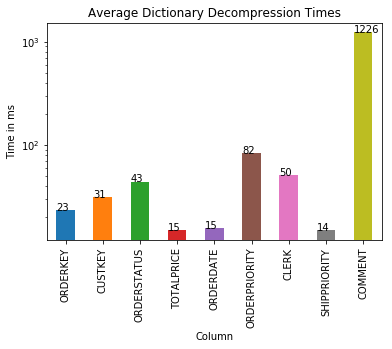

In [7]:
path = '../data/dictionary/decompression_times.csv'
data = pd.read_csv(path, sep=',')
data, label = toMilliseconds(data)

ax = data.apply(pd.Series.mean).plot(kind='bar', logy=True, title='Average ' + pathToTitle(path))
ax.set(xlabel="Column", ylabel=label)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

data.iloc[0]

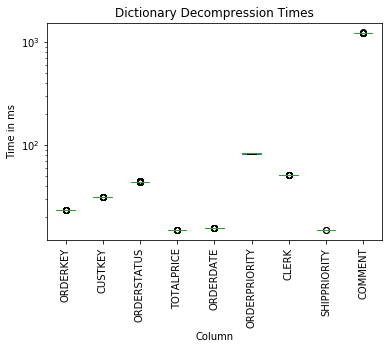

In [8]:
path = '../data/dictionary/decompression_times.csv'
data = pd.read_csv(path, sep=',')
data, label = toMilliseconds(data)

ax = data.plot(kind='box', logy=True, title=pathToTitle(path))
plt.xticks(rotation=90)
ax.set(xlabel="Column", ylabel=label)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))